# 分類

## 鳶尾花

[超連結](https://www.google.com)

```python
print('Hello')
```

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston['data'],
                 columns=boston['feature_names'])
df['ans'] = boston['target']
df.to_csv('iris.csv',encoding='utf-8',index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
from sklearn.model_selection import train_test_split

# [90%題目, 10%題目, 90%答案, 10%答案]
x_train,x_test,y_train,y_test = train_test_split(boston['data'],
                                                 boston['target'], 
                                                 test_size=0.1)

In [3]:
# ready method
# 回歸
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4)

In [4]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

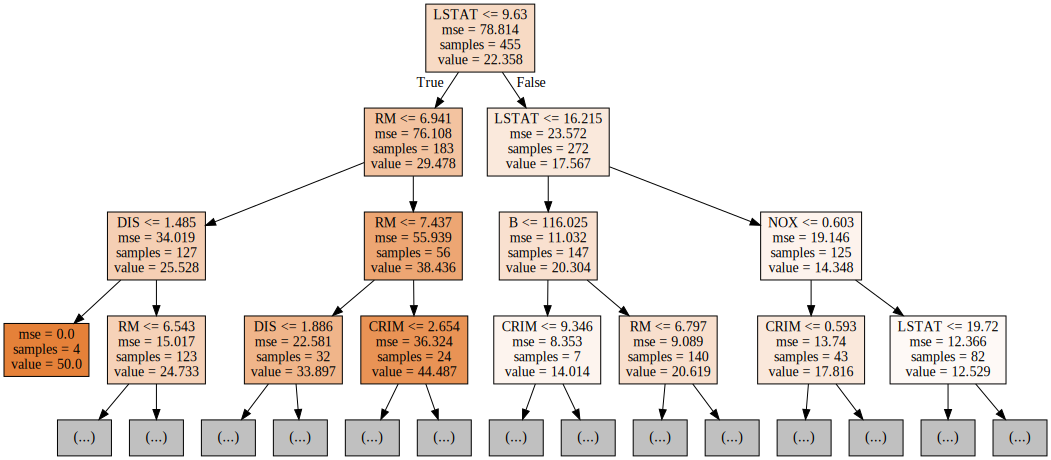

In [8]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg,
                   feature_names=boston['feature_names'],
                   filled=True,
                   max_depth=3)
graphviz.Source(g)

In [6]:
pre = reg.predict(x_test)
pre

array([22.97564103, 15.21515152, 20.33007519, 22.97564103, 20.33007519,
       20.33007519, 15.735     , 27.77777778, 10.72040816, 15.21515152,
       45.46956522, 27.77777778, 22.97564103, 33.11333333, 45.46956522,
       10.72040816, 15.21515152, 15.735     , 10.72040816, 20.33007519,
       20.33007519, 22.97564103, 33.11333333, 45.46956522, 20.33007519,
       33.11333333, 19.62608696, 10.72040816, 45.46956522, 45.46956522,
       20.33007519, 27.77777778, 45.46956522, 33.11333333, 33.11333333,
       33.11333333, 20.33007519, 20.33007519, 10.72040816, 27.77777778,
       33.11333333, 15.21515152, 22.97564103, 15.21515152, 10.72040816,
       20.33007519, 10.72040816, 22.97564103, 22.97564103, 16.76666667,
       15.735     ])

In [7]:
from sklearn.metrics import r2_score
print('預測:',pre)
print('正確:',y_test)
print('R2 score', r2_score(y_test,pre))

預測: [22.97564103 15.21515152 20.33007519 22.97564103 20.33007519 20.33007519
 15.735      27.77777778 10.72040816 15.21515152 45.46956522 27.77777778
 22.97564103 33.11333333 45.46956522 10.72040816 15.21515152 15.735
 10.72040816 20.33007519 20.33007519 22.97564103 33.11333333 45.46956522
 20.33007519 33.11333333 19.62608696 10.72040816 45.46956522 45.46956522
 20.33007519 27.77777778 45.46956522 33.11333333 33.11333333 33.11333333
 20.33007519 20.33007519 10.72040816 27.77777778 33.11333333 15.21515152
 22.97564103 15.21515152 10.72040816 20.33007519 10.72040816 22.97564103
 22.97564103 16.76666667 15.735     ]
正確: [20.4 18.1 16.8 23.4 24.  28.7 13.1 30.1  8.3 16.2 50.  26.5 22.6 32.7
 50.  15.6 13.  14.8 11.9 21.4 18.7 20.9 33.1 50.  23.  37.3 16.6  5.
 50.  35.2 21.8 25.  50.  34.9 35.4 28.7 24.4 18.3 10.5 32.5 29.  12.5
 21.  15.4 11.8 21.   7.  26.4 23.7 13.1 19.1]
R2 score 0.909568737653392
